# Project: Wrangling and Analyze Data

In [1]:
# Install the twitter API
!pip install tweepy

In [2]:
# Import Libraries
import os
import re
import time
import json
import tweepy
import requests
import webbrowser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
if not os.path.exists('twitter_archive_enhanced.csv'): #confirm if file not downloaded already
    try:
        url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
        urlretrieve(url, 'twitter_archive_enhanced.csv')
        print('File saved successfully')
    except OSError as e:
        print(e)

In [4]:
df_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
if not os.path.exists("image_predictions.tsv"):
    try:
        url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
        page = requests.get(url)
        print('Connection sucessful')
        with open('image_predictions.tsv', 'wb') as file:
            file.write(page.content)
            print('File saved successfully')
    except OSError as e:
        print(e)

In [6]:
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
tweet_ids = list(df_archive.tweet_id)

file_name = 'tweet_ids.txt'
with open(file_name, 'w') as f:
    for id in tweet_ids:
        f.write(f'{str(id)}\n')

# Test if it can be printed line by line.

with open(file_name, 'r') as f:
    tweet_ids = f.readline()
    print(tweet_ids)

892420643555336193



In [8]:
# Download tweets with API
# Expect an error as tokens and keys are not provided in submission

In [9]:
print(r'Error: Kindly provide the consumer_key, consumer_screet, access_token, '
      'access_screet and bearer_token')

#import tweepy
#from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "Your Key Here"
consumer_secret = "Your Key Here"
access_token = "Your Key Here"
access_secret = "Your Key Here"
bearer_token = "Your Key Here"

#auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Same result as the cell above but data not saved here
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Error: Kindly provide the consumer_key, consumer_screet, access_token, access_screet and bearer_token


NameError: name 'auth' is not defined

In [10]:
# Read the tweet_json.txt file

In [11]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [12]:
# Select columns to be used for the analysis
id = []
favorite_count = []
retweet_count = []
created_at = []
for value in tweets:
  id.append(value['id'])
  favorite_count.append(value['favorite_count'])
  retweet_count.append(value['retweet_count'])
  date = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(value['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
  created_at.append(date)


dict = {
    'Created_at' : created_at,
    'tweet_id' : id,
    'favorite_count' : favorite_count,
    'retweet_count' : retweet_count,
    }

df_tweet = pd.DataFrame(dict)

In [13]:
df_tweet.head()

,Created_at,tweet_id,favorite_count,retweet_count
0,2017-08-01 16:23:56,892420643555336193,33810,7009
1,2017-08-01 00:17:27,892177421306343426,29330,5301
2,2017-07-31 00:18:03,891815181378084864,22053,3481
3,2017-07-30 15:58:51,891689557279858688,36940,7225
4,2017-07-29 16:00:24,891327558926688256,35310,7760


## Assessing Data

In [17]:
df_archive
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
df_image
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_tweet
df_tweet.head()

,Created_at,tweet_id,favorite_count,retweet_count
0,2017-08-01 16:23:56,892420643555336193,33810,7009
1,2017-08-01 00:17:27,892177421306343426,29330,5301
2,2017-07-31 00:18:03,891815181378084864,22053,3481
3,2017-07-30 15:58:51,891689557279858688,36940,7225
4,2017-07-29 16:00:24,891327558926688256,35310,7760


In [20]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
Created_at        2327 non-null object
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [23]:
all_columns = pd.Series(list(df_archive) + list(df_image) + list(df_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
30    tweet_id
dtype: object

In [24]:
df_archive.isnull().sum().sum()

11140

In [25]:
df_image.isnull().sum().sum()

0

In [26]:
df_tweet.isnull().sum().sum()

0

In [27]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
df_tweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7054.808767,2471.230769
std,6.820795e+16,10963.276515,4185.223445
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1225.500000,494.500000
50%,7.178418e+17,3050.000000,1149.000000
75%,7.986547e+17,8606.000000,2860.500000
max,8.924206e+17,144897.000000,70742.000000


In [30]:
df_archive['in_reply_to_status_id'].unique()

array([             nan,   8.86266357e+17,   8.81607037e+17,
         8.79553827e+17,   8.70726203e+17,   8.63425646e+17,
         6.67152164e+17,   8.57156678e+17,   8.55818117e+17,
         8.56286004e+17,   8.55861584e+17,   8.55858536e+17,
         8.50328819e+17,   8.48212112e+17,   8.47606176e+17,
         7.59099524e+17,   8.40698300e+17,   8.38145499e+17,
         8.38085539e+17,   8.35245984e+17,   8.32087548e+17,
         8.31903044e+17,   8.26598365e+17,   8.23326389e+17,
         8.21152593e+17,   8.13127252e+17,   8.11627233e+17,
         7.33109485e+17,   8.01854331e+17,   8.00857954e+17,
         7.97123751e+17,   7.72743019e+17,   7.66711819e+17,
         7.63865175e+17,   7.50180499e+17,   7.47648654e+17,
         7.46885919e+17,   6.91416866e+17,   7.38411920e+17,
         7.29113531e+17,   7.07980066e+17,   7.03255936e+17,
         7.04485745e+17,   7.03041950e+17,   6.96488711e+17,
         6.75349384e+17,   6.70668383e+17,   6.93642232e+17,
         6.93572216e+17,

In [31]:
df_archive['in_reply_to_user_id'].unique()

array([             nan,   2.28118160e+09,   4.73844300e+07,
         3.10544075e+09,   1.64877600e+07,   7.75962000e+07,
         4.19698384e+09,   1.80670967e+08,   2.79280991e+08,
         1.94351775e+08,   1.36157220e+07,   2.19550580e+07,
         8.40547864e+17,   2.89413118e+09,   2.62595760e+07,
         3.05820820e+07,   2.06837240e+07,   1.58285381e+09,
         1.13211856e+08,   1.18563420e+07,   2.91859009e+08,
         2.91663050e+07,   7.30505014e+17,   1.58464070e+07,
         4.71729748e+09,   3.58972768e+08,   2.31910820e+09,
         2.87854860e+07,   1.19898851e+09,   4.67036706e+08,
         1.63746780e+07,   2.14356580e+07])

In [32]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
508,812503143955202048,NaN,NaN,2016-12-24 03:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm happy to inform you all that Jake is in ex...,NaN,NaN,NaN,https://m.facebook.com/story.php?story_fbid=18...,13,10,None,None,None,None,None
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Tuck. As you can see, he's rather h*ck...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/846874817...,13,10,Tuck,None,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None


In [33]:
df_archive.tweet_id.duplicated().sum()

0

In [34]:
df_archive.doggo.duplicated().sum()

2354

In [35]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [36]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [37]:
df_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [38]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1044,712717840512598017,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great_Pyrenees,0.732043,True,kuvasz,0.121375,True,Irish_wolfhound,0.049524,True
845,695095422348574720,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,papillon,0.227784,True,Chihuahua,0.218128,True,Border_collie,0.093457,True
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True
77,667437278097252352,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False
1316,755110668769038337,https://pbs.twimg.com/ext_tw_video_thumb/75511...,1,Labrador_retriever,0.708974,True,golden_retriever,0.114314,True,Great_Pyrenees,0.065813,True


In [39]:
df_image.p1_dog.unique()

array([ True, False], dtype=bool)

In [40]:
df_image.p2_dog.unique()

array([ True, False], dtype=bool)

In [41]:
df_image.p3_dog.unique()

array([ True, False], dtype=bool)

In [42]:
df_tweet.sample(5)

,Created_at,tweet_id,favorite_count,retweet_count
972,2016-06-29 01:23:16,747963614829678593,5389,1958
2318,2015-11-16 00:55:59,666057090499244032,247,112
1826,2015-12-12 04:23:49,675531475945709568,1069,332
1575,2016-01-09 21:58:42,685943807276412928,1498,536
2221,2015-11-20 22:30:44,667832474953625600,255,55


### Quality issues

1. A lot of missing data in the features (archive)

2. Change the datatype for some of the columns i.e. timestamp (archive)

3. Change invalid names to "None" (archive)

4. Expanded_url containing more than one url (archive)
    
5. Lowercase for P1, P2, and P3 occassionally (image)

6. Text column not properly formatted (image)

7. Extract the date from Created_at column (tweet)

8. Rename the Created_at column as Timestamp to bridge uniformity (tweet)

### Tidiness issues
1. tweet_id is found across all three tables and should be merged into a single column

2. Dog stages should be in a single column rather than having the dog stage values as columns

## Cleaning Data

In [46]:
# Make copies of original pieces of data
archive = df_archive.copy()
image = df_image.copy()
tweet = df_tweet.copy()

### Issue #1: Missing Data

#### Define: 
in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp contain little or no meaningful data and should be dropped as both columns and rows (with non-null values)

#### Code

In [47]:
twitter_archives_clean = archive[archive.in_reply_to_status_id.isnull()]

In [48]:
twitter_archives_clean = archive[archive.in_reply_to_user_id.isnull()]

In [49]:
twitter_archives_clean = archive[archive.retweeted_status_id.isnull()]

In [50]:
twitter_archives_clean = archive[archive.retweeted_status_user_id.isnull()]

In [51]:
twitter_archives_clean = archive[archive.retweeted_status_timestamp.isnull()]

In [52]:
archive.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], inplace = True)

#### Test

In [53]:
twitter_archives_clean[twitter_archives_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [54]:
twitter_archives_clean[twitter_archives_clean.in_reply_to_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [55]:
twitter_archives_clean[twitter_archives_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [56]:
twitter_archives_clean[twitter_archives_clean.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [57]:
twitter_archives_clean[twitter_archives_clean.retweeted_status_timestamp.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [58]:
twitter_archives_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2: Data Type Changes

1. archive: Timestamp is a datetime and not an object
2. archive: Tweet_id is an object not an integer
3. image: P2_dog is a boolean not an integer
4. tweet: Created_at is a datetime and not an integer

#### Define
Change the timestamp datatype to datetime, P2_dog to boolean, and tweet_id to object, and created_at to datetime

#### Code

In [61]:
archive['timestamp'] = pd.to_datetime(archive['timestamp'])
archive['tweet_id'] = archive['tweet_id'].astype(str)
image['tweet_id'] = image['tweet_id'].astype(str)
image['p2_dog'] =  image['p2_dog'].astype(bool)
tweet['Created_at'] = pd.to_datetime(tweet['Created_at'])
tweet['tweet_id'] = tweet['tweet_id'].astype(str)

#### Test

In [62]:
archive.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

In [63]:
image.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [64]:
tweet.dtypes

Created_at        datetime64[ns]
tweet_id                  object
favorite_count             int64
retweet_count              int64
dtype: object

### Issue #3: Drop invalid names

#### Define: 
Convert all invalid names into "None"

#### Code

In [65]:
names_mask = archive.name.str.contains('^[a-z]', regex = True)
archive[names_mask].name.value_counts().sort_index()
archive.loc[names_mask, 'name'] = "None"

#### Test

In [66]:
archive[names_mask].name.value_counts()

None    109
Name: name, dtype: int64

### Issue #4: expanded_url with more than one url

#### Define
Extract a normal url pattern from expanded_urls

#### Code

In [67]:
archive['expanded_urls']  = archive.expanded_urls.str.extract('(https://\w+\.com/\w+/\w+/\d+/\w+/\d)', expand = True)

#### Test

In [68]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #5: Format P1, P2, and P3 in the image table

#### Define
Replace "_" with space (" ") for P1, P2, and P3 in the image table

#### Code

In [69]:
image.p1 = image.p1.str.replace("_", ",")
image.p2 = image.p2.str.replace("_", ",")
image.p3 = image.p3.str.replace("_", ",")

#### Test

In [70]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,"Welsh,springer,spaniel",0.465074,True,collie,0.156665,True,"Shetland,sheepdog",0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,"miniature,pinscher",0.074192,True,"Rhodesian,ridgeback",0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,"German,shepherd",0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,"Rhodesian,ridgeback",0.408143,True,redbone,0.360687,True,"miniature,pinscher",0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,"miniature,pinscher",0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #6: Extract date from timestamp (created_at) column

#### Define
Make the timestamp to contain year, month, and day only

#### Code

In [82]:
archive.timestamp = pd.to_datetime(archive.timestamp, yearfirst = True)

In [83]:
# Using the apply function, applying the strftime function to each value of the timestamp column in each row
archive['date'] = archive['timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
archive['time'] = archive['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

# Changing datatype of the date column to datetime
archive.date = pd.to_datetime(archive.date, dayfirst = True)

In [84]:
# Dropping the timestamp column
archive = archive.drop('timestamp', axis = 1)

#### Test

In [85]:
archive.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Issue #7: Text column formatting

#### Define
Remove html tags from the source column in the archive table

#### Code

In [86]:
archive['source']  = archive.source.str.extract('(http://\w+\.com/\w+/iphone)', expand = True)

#### Test

In [87]:
archive.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Issue #8: Format Column Names

#### Define
Change the created_at to timestamp in tweet table

#### Code

In [88]:
archive.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date', 'time'],
      dtype='object')

In [89]:
image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [90]:
tweet.rename(columns= {"Created_at": "timestamp"}, inplace = True)

#### Test

In [91]:
tweet.columns

Index(['timestamp', 'tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

## Tidiness Issue #1: tweet_id merge

#### Define

Merge archive, image, and tweet on "tweet_id" and create a cleaned master dataset as a CSV file named "twitter_archive_master.csv"

In [92]:
twitter_archive_master = pd.merge(pd.merge(archive, image, on = "tweet_id"), tweet, on = "tweet_id")

In [93]:
twitter_archive_master.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,favorite_count,retweet_count
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56,33810,7009
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27,29330,5301
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03,22053,3481
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,False,"Labrador,retriever",0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51,36940,7225
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,True,"English,springer",0.225770,True,"German,short-haired,pointer",0.175219,True,2017-07-29 16:00:24,35310,7760


### Data Engineering

In [95]:
twitter_archive_master['month'] = twitter_archive_master.timestamp.dt.month_name()
twitter_archive_master['day'] = twitter_archive_master.timestamp.dt.day_name()

In [96]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index = False)

## Tidiness Issue #2: Dog Stages

#### Define

Dog stages should be in a single column rather than having the dog stages as seperate columns

#### Code

In [97]:
make_dummy = lambda x: 0 if x == 'None' else 1

archive.doggo = archive.doggo.apply(make_dummy)
archive.floofer = archive.floofer.apply(make_dummy)
archive.pupper = archive.pupper.apply(make_dummy)
archive.puppo = archive.puppo.apply(make_dummy)
archive['none'] = archive['doggo'] + archive['floofer'] + \
                        archive['pupper'] + archive['puppo']

In [98]:
stage_none = lambda x: 1 if x == 0 else 0 
archive['none'] = archive['none'].apply(stage_none)

stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']
conditions = [
    (archive[stage[0]] == 1),
    (archive[stage[1]] == 1),
    (archive[stage[2]] == 1),
    (archive[stage[3]] == 1),
    (archive[stage[4]] == 1)]

archive['stage'] = np.select(conditions, stage, default = stage[4])
archive.drop(stage, axis = 1, inplace = True)
archive['stage'] = archive.stage.astype('category')

#### Test

In [99]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
source                2221 non-null object
text                  2356 non-null object
expanded_urls         2159 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
date                  2356 non-null datetime64[ns]
time                  2356 non-null object
stage                 2356 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(6)
memory usage: 168.2+ KB


## Analyzing and Visualizing Data


### Questions

1. Top ten months with the highest favorite_count
2. Top ten months with the hightest tweet_count
3. Influence of the day on the favorite_count
4. Finding the correlation between the Favorite and Retweet counts


# Insights

### Write function for the visualization

In [101]:
df = twitter_archive_master.copy()

In [104]:
def barhplot(x, y, xlabel, title):
    plt.figure(figsize=  (14, 8))
    plt.barh(x, y, align = 'center')
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel, fontsize = 18)
    plt.title(title, fontsize = 18)
    plt.show();

### Top ten months with the highest favorite_count

In [103]:
top = df.sort_values(by = 'favorite_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'favorite_count', 'month']].head(10)
top_10

,tweet_id,source,favorite_count,month
836,744234799360020481,http://twitter.com/download/iphone,144897,June
319,822872901745569793,http://twitter.com/download/iphone,124127,January
422,807106840509214720,http://twitter.com/download/iphone,111710,December
110,866450705531457537,http://twitter.com/download/iphone,108924,May
871,739238157791694849,http://twitter.com/download/iphone,107253,June
59,879415818425184262,http://twitter.com/download/iphone,92885,June
348,819004803107983360,http://twitter.com/download/iphone,82714,January
138,859196978902773760,http://twitter.com/download/iphone,80607,May
94,870374049280663552,http://twitter.com/download/iphone,73941,June
1485,678399652199309312,http://twitter.com/download/iphone,73528,December


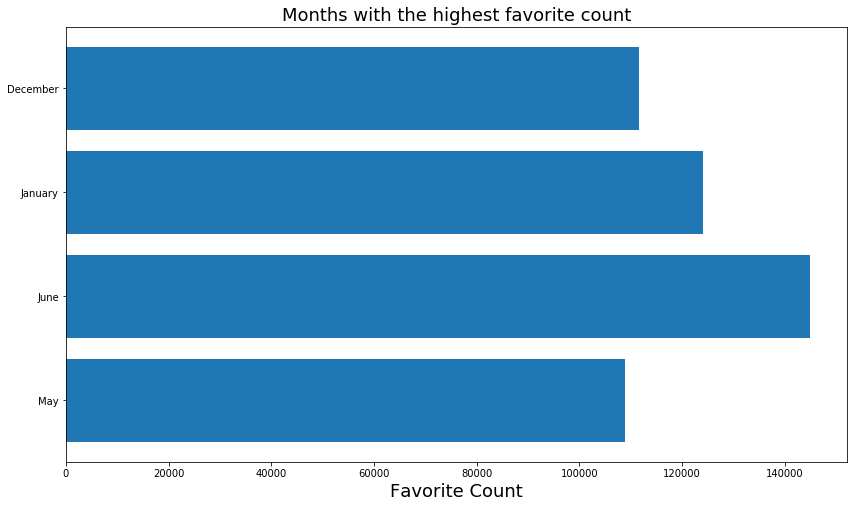

In [105]:
barhplot(top_10.month, top_10.favorite_count, "Favorite Count", "Months with the highest favorite count")

### Top ten months with the highest retweet_count

In [106]:
top = df.sort_values(by = 'retweet_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'text', 'retweet_count', 'month']].head(10)
top_10.head()

,tweet_id,source,text,retweet_count,month
836,744234799360020481,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,70742,June
871,739238157791694849,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,52908,June
422,807106840509214720,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,51687,December
319,822872901745569793,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,39926,January
59,879415818425184262,http://twitter.com/download/iphone,This is Duddles. He did an attempt. 13/10 some...,37457,June


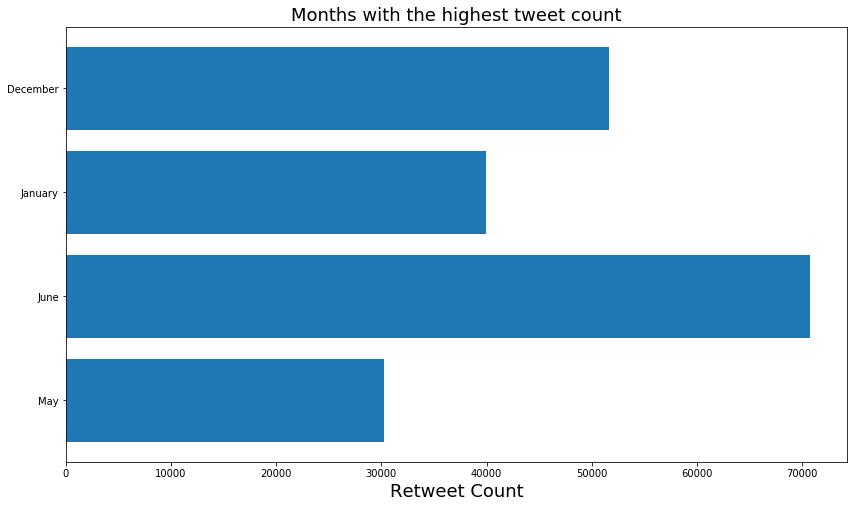

In [107]:
barhplot(top_10.month, top_10.retweet_count, "Retweet Count", "Months with the highest tweet count")

### Influence of the day on the favorite_count

In [108]:
top = df.groupby(by = 'day')
top = df.sort_values(by = 'favorite_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'text', 'favorite_count', 'day']].head(10)
top_10.head()

,tweet_id,source,text,favorite_count,day
836,744234799360020481,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,144897,Saturday
319,822872901745569793,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,124127,Saturday
422,807106840509214720,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,111710,Friday
110,866450705531457537,http://twitter.com/download/iphone,This is Jamesy. He gives a kiss to every other...,108924,Monday
871,739238157791694849,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,107253,Saturday


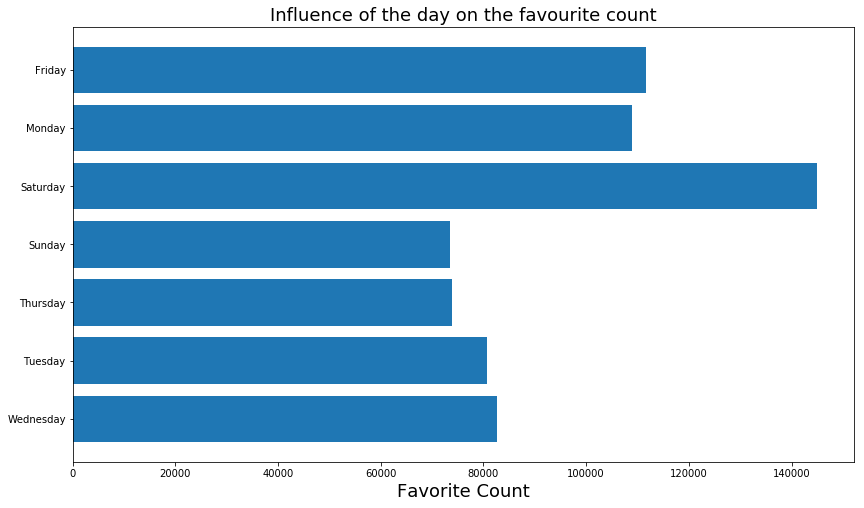

In [109]:
barhplot(top_10.day, top_10.favorite_count, "Favorite Count", "Influence of the day on the favourite count")

### Finding the correlation between the Favorite and Retweet counts

In [110]:
df.favorite_count.corr(df.retweet_count)

0.86102978252850915

### Visualization

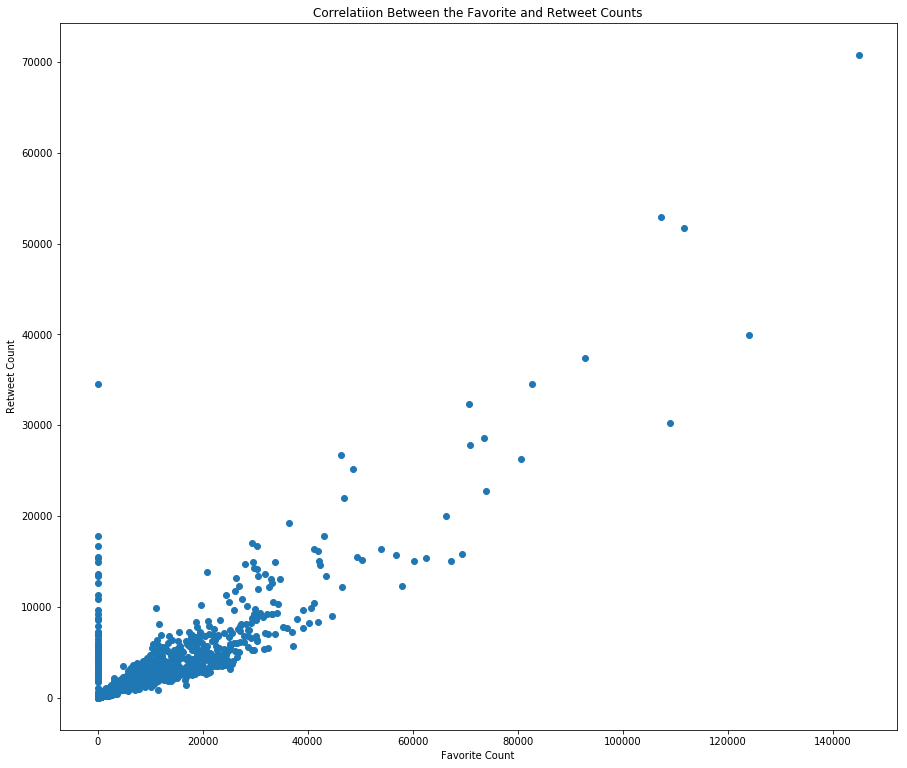

In [111]:
plt.figure(figsize=(15, 13))
ax = plt.axes()
ax.scatter(df.favorite_count, df.retweet_count)

ax.set_xlabel('Favorite Count')
ax.set_ylabel('Retweet Count')
ax.set_title('Correlatiion Between the Favorite and Retweet Counts')

ax.axis('tight')

plt.show()

### Checking for other correlations

1. Between favorite_count and rating_numerator
2. Between favorite_count and rating_denominator
3. Between retweet_count and rating_numerator
4. Between retweet_count and rating_denominator

In [112]:
df.favorite_count.corr(df.rating_numerator)

0.01605740884435734

In [113]:
df.favorite_count.corr(df.rating_denominator)

-0.025221199482836899

In [114]:
df.retweet_count.corr(df.rating_numerator)

0.01765920274621292

In [115]:
df.retweet_count.corr(df.rating_denominator)

-0.021366610584886463